# 1. Introduction
ImageSynchronizer is an image dataset management project.

We strongly advise users use [Jupyter Notebook](https://jupyter.org/) to run the following examples, which can display [pandas](https://pandas.pydata.org/) datasets information neater. 

#### Installation

 1. Install Microsft ODBC driver  
    [Linux](https://docs.microsoft.com/zh-tw/sql/connect/odbc/linux-mac/installing-the-microsoft-odbc-driver-for-sql-server?view=sql-server-ver15)    
    [Windows](https://docs.microsoft.com/zh-tw/sql/connect/odbc/download-odbc-driver-for-sql-server?view=sql-server-ver15)     

 2. Download the package from this [link](https://ulsee01-my.sharepoint.com/:u:/g/personal/jim_chen_ulsee_com/EXJclaGq-vZKl2VPW55_PSIBsK48HuluaWQ3wz4IQCLWGQ?e=00PhFN) (Only allow ULSee domain to download).

 3. Install by : 
 
 Windows : `python setup.py install`
 
 Linux : `sudo python3 setup.py install`


#### How ImageSynchronizer work?
![](./imgs/demo.png)

***

# 2. How dataset naming?

### Dataset name format : 


### <span style="color:red">source_</span><span style="color:green">name_</span><span style="color:blue">imtype_</span><span style="color:black">labeltype</span>


 * **<span style="color:red">source : Data set source</span>**
   
   - Original : This dataset is original which is taken by manager.
   - Opensource : This dataset is opensource and comes from internet.
    
 * **<span style="color:green">name : Data set release date or open dataset name</span>**
 
   - Original dataset : The date that dataset uploaded to ImageSynchronizer databse.
   - Opensource dataset : The dataset name.
    
 * **<span style="color:blue">imtype : Image type</span>**
   
   - The image type of this dataset, it might be one of the following :
   - rgb, dvs, fisheye, dewarp
    
 * **<span style="color:black">labeltype : Labeling type</span>**
   
   - bbox  : Normal bounding box
   - seg   : Semantic segmentation
   - clf   : Classification
   - rbbox : Rotated bounding box (bounding box with angle)
   - poly  : Polygon
   - reg   : Regression
   

### Example : opensource_widerface_rgb_bbox

※ Each labeling type has its own json annotation format.

***

# 3. Usage

#### 1. Connect to SQL database and image storage

In [1]:
from ImageSynchronizer import ImageSynchronizer
server = "serverurl" # for example of MS Azure : "xxxxxx.database.windows.net"
database = "dbname" # name of database
username = "username"
password = "password"
sync = ImageSynchronizer.synchronizer(server, database, username)

Connecting to Azure database....
Connecting to data storage...


#### 2. Datasets information

After SQL database connected, *datasetsInfo* attributes will list the details of available datasets.

 * **datasetID** : Names of dataset
 * **version** : The labeling standard. For example, version 1.0.0 means bounding box only contains 'person' category, but after discussion, the new label standard becomes 'person with face' and 'person without face' categories, which is version 2.0.0.
 * **image_type** : What kind of image in this dataset

In [2]:
# Show the detail of all available dataset
sync.datasetsInfo

,datasetID,label_version,image_type,classes,projects,label_type,size,note
0,opensource_habbof_rgb_rbbox,2.0.0,fisheye360,person,wework,rbbox,5837,
1,opensource_handraised_rgb_bbox,1.0.0,rgb,person,sbr,bbox,3968,people detection dataset with hand raised person
2,opensource_imdbwiki&affectnet_rgb_clf&reg,1.0.0,rgb,"gender,emotion","sbr,bestbuy","clf,reg",0,"age, gender, emotion dataset"
3,opensource_maskedface_rgb_bbox,1.0.0,rgb,face,sbr,bbox,1526,face detction dataset with masked faces
4,opensource_widerface_rgb_bbox,1.0.0,rgb,face,sbr,bbox,8036,opensource face detection dataset - wider face
5,original_20200114_rgb_bbox,1.0.0,rgb,face,sbr,bbox,718,
6,original_20200120_rgb_bbox,1.0.0,rgb,face,sbr,bbox,6462,
7,original_20200121_rgb_bbox,1.0.0,rgb,face,sbr,bbox,6434,
8,original_20200207_fisheye_rbbox,2.0.0,fisheye360,person,wework,rbbox,161,"old ulsee 3F office - working area, known as W..."
9,original_20200219_dewarp_bbox,2.0.0,dewarp,person,sbr,bbox,8125,


#### 3. Make subscription with specific condition

In [3]:
# Define a susbscription condition and get the dataset ID
datasets = sync.datasetsInfo[sync.datasetsInfo['image_type']=='fisheye360']['datasetID']
# Only subscript original dataset
datasets = [i for i in datasets if 'opensource' not in i]
# Make a subscription request
sync.subscribe(datasets=datasets)

In [4]:
# Show the dataset detail of your subscription
sync.datasetsInfo_subscribed

,datasetID,label_version,image_type,classes,projects,label_type,size,note
8,original_20200207_fisheye_rbbox,2.0.0,fisheye360,person,wework,rbbox,161,"old ulsee 3F office - working area, known as W..."
10,original_20200219_fisheye_rbbox,2.0.0,fisheye360,person,wework,rbbox,62,(Under inspection)know as Ceiling_OwnRecord_Pa...
13,original_20200227_fisheye_rbbox,2.0.0,fisheye360,person,wework,rbbox,325,(Under inspection)know as Ceiling_OwnRecord_Pa...
16,original_20200316_fisheye_rbbox,2.0.0,fisheye360,person,wework,rbbox,333,know as Ceiling_OwnRecord_Party3
18,original_20200325_fisheye_rbbox,2.0.0,fisheye360,person,wework,rbbox,210,know as Ceiling_OwnRecord_Party4
19,original_20200327_fisheye_rbbox,2.0.0,fisheye360,person,wework,rbbox,835,ulsee 9F office - relaxing area
21,original_20200414_fisheye_rbbox,2.0.0,fisheye360,person,wework,rbbox,1324,ulsee 9F office - working area


#### 4. Sync dataset to target folder

In [5]:
# After a subscription has been made, synchronization can be proceed on a target folder.
sync.update_subscription(target_path = "./test")
# This procesdure may take few hours, depends on the internet speed and dataset size.
# Note : This function only sync those image that not included in target_path..

# You can also specify the amount of image to subscript incase the dataset is too large
sync.update_subscription(target_path = "./test", amount = 50)

Syncing files : original_20200414_fisheye_rbbox - 2648/2648

Synchronization complete!


#### 5. Use custom draw_box function preview dataset with label

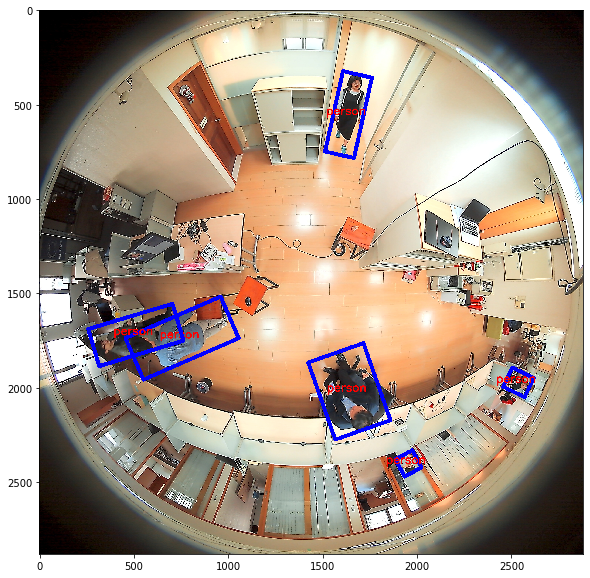

In [6]:
from ImageSynchronizer.utils import draw_box
import glob
import numpy as np
import matplotlib.pyplot as plt

anno_list = glob.glob(r"test/**/*.json")
rdn_anno = np.random.choice(anno_list,1)[0]
img = draw_box(rdn_anno)
plt.figure(figsize = (10,10))
plt.imshow(img[...,::-1])

***

# 4. Annotation format introduction

ImageSynchronizer has a standard annotation format saved as json file : 

 - anno_version : annotation format version of ImageSynchronizer
 - label_checked : whether this label file checked by manager or not (1 is checked, 0 is not)
 - height : height of image corresponding to this label file
 - width : width of image corresponding to this label file
 - depth : depth(channels) of image corresponding to this label file
 - ext : filename extension of image corresponding to this label file
 - labels : label image corresponding to this label file, it could be multiple label contains in a list
 
Lets take a look at an example with multi-attribute label type: 

***
{    
$~$$~$"anno_version":$~$"0.2.0",    
$~$$~$"label_checked":$~$1,    
$~$$~$"height":$~$264,    
$~$$~$"width":$~$263,    
$~$$~$"depth":$~$3,    
$~$$~$"ext":$~$"jpg",    
$~$$~$"labels":$~$[
$~$$~$$~$$~${    
$~$$~$$~$$~$$~$$~$"label_type":$~$"clf",    
$~$$~$$~$$~$$~$$~$"label_name":$~$"Gender",    
$~$$~$$~$$~$$~$$~$"label":$~$"Female"    
$~$$~$$~$$~$},    
$~$$~$$~$$~${    
$~$$~$$~$$~$$~$$~$"label_type":$~$"clf",    
$~$$~$$~$$~$$~$$~$"label_name":$~$"Emotion",    
$~$$~$$~$$~$$~$$~$"label":$~$"Happiness"    
$~$$~$$~$$~$},    
$~$$~$$~$$~${    
$~$$~$$~$$~$$~$$~$"label_type":$~$"reg",    
$~$$~$$~$$~$$~$$~$"label_name":$~$"Age",    
$~$$~$$~$$~$$~$$~$"label":$~$42    
$~$$~$$~$$~$}    
$~$$~$]    
}    
***

This annotation file corresponding to an image with shape (264, 264, 3), and this image has three different label : 
 - Age : A regression attribute, which value is 42
 - Gender : A classification attribute, which value is "Female"
 - Emotion : A classification attribute, which value is "Happiness"
 
Lets take a look at another example with 'bbox' label type:

***
{    
$~$$~$"anno_version"$~$: "0.2.0",    
$~$$~$"label_checked"$~$: 1,    
$~$$~$"height"$~$: 300,    
$~$$~$"width"$~$: 300,    
$~$$~$"depth"$~$: 3,    
$~$$~$"ext"$~$: "jpg",    
$~$$~$"labels"$~$: [    
$~$$~$$~$$~${    
$~$$~$$~$$~$$~$$~$"label_type"$~$: "bbox",    
$~$$~$$~$$~$$~$$~$"object"$~$: [    
$~$$~$$~$$~$$~$$~$$~$$~${    
$~$$~$$~$$~$$~$$~$$~$$~$$~$$~$"class"$~$: "person",    
$~$$~$$~$$~$$~$$~$$~$$~$$~$$~$"x1"$~$: 25.367088607594937,    
$~$$~$$~$$~$$~$$~$$~$$~$$~$$~$"y1"$~$: 182.74683544303798,    
$~$$~$$~$$~$$~$$~$$~$$~$$~$$~$"x2"$~$: 42.79746835443038,    
$~$$~$$~$$~$$~$$~$$~$$~$$~$$~$"y2"$~$: 200.31645569620252    
$~$$~$$~$$~$$~$$~$$~$$~$},    
$~$$~$$~$$~$$~$$~$$~$$~${    
$~$$~$$~$$~$$~$$~$$~$$~$$~$$~$ "class"$~$: "person",    
$~$$~$$~$$~$$~$$~$$~$$~$$~$$~$"x1"$~$: 88.0506329113924,    
$~$$~$$~$$~$$~$$~$$~$$~$$~$$~$"y1"$~$: 58.0,    
$~$$~$$~$$~$$~$$~$$~$$~$$~$$~$"x2"$~$: 128.0506329113924,    
$~$$~$$~$$~$$~$$~$$~$$~$$~$$~$"y2"$~$: 100.0    
$~$$~$$~$$~$$~$$~$$~$$~$}    
$~$$~$$~$$~$$~$$~$]    
$~$$~$$~$$~$}    
$~$$~$]    
}    
***

This annotation file corresponding to an image with shape (300, 300, 3), and this image is for object detection training: 
 - bbox : bounding box coordinate and class
 - (x1, y1) : lefttop coordinate
 - (x2, y2) : rightbutton coordinate
 
Lets take a look at the last one example with 'rbbox' label type:

***
{    
$~$$~$"anno_version" :$~$"0.2.0",    
$~$$~$"label_checked" :$~$1,    
$~$$~$"height" :$~$2880,    
$~$$~$"width" :$~$2880,    
$~$$~$"depth" :$~$3,    
$~$$~$"ext" :$~$"jpg",    
$~$$~$"labels" :$~$[    
$~$$~$$~$$~${    
$~$$~$$~$$~$$~$$~$"label_type"$~$:$~$"rbbox",    
$~$$~$$~$$~$$~$$~$"object" :$~$[
$~$$~$$~$$~$$~$$~$$~$$~${    
$~$$~$$~$$~$$~$$~$$~$$~$$~$$~$"class" :$~$"person",    
$~$$~$$~$$~$$~$$~$$~$$~$$~$$~$"x" :$~$1433.5394,    
$~$$~$$~$$~$$~$$~$$~$$~$$~$$~$"y" :$~$1151.9007,    
$~$$~$$~$$~$$~$$~$$~$$~$$~$$~$"w" :$~$206.441,    
$~$$~$$~$$~$$~$$~$$~$$~$$~$$~$"h" :$~$383.9458,    
$~$$~$$~$$~$$~$$~$$~$$~$$~$$~$"a" :$~$1.548375    
$~$$~$$~$$~$$~$$~$$~$$~$},    
$~$$~$$~$$~$$~$$~$$~$$~${    
$~$$~$$~$$~$$~$$~$$~$$~$$~$$~$"class" :$~$"person",    
$~$$~$$~$$~$$~$$~$$~$$~$$~$$~$"x" :$~$1921.1333,    
$~$$~$$~$$~$$~$$~$$~$$~$$~$$~$"y" :$~$1115.2,    
$~$$~$$~$$~$$~$$~$$~$$~$$~$$~$"w" :$~$472.2526,    
$~$$~$$~$$~$$~$$~$$~$$~$$~$$~$"h" :$~$317.7133,    
$~$$~$$~$$~$$~$$~$$~$$~$$~$$~$"a" :$~$2.547793    
$~$$~$$~$$~$$~$$~$$~$$~$}    
$~$$~$$~$$~$$~$$~$]    
$~$$~$$~$$~$}    
$~$$~$]    
}    
***

This annotation file corresponding to an image with shape (2880, 2880, 3), this one is a fisheye image: 
 - rbbox : rotated bounding box coordinate and class
 - x : rotated bounding box x-axis center, equivalent to (x1+x2)/2
 - y : rotated bounding box y-axis center, equivalent to (y1+y2)/2
 - w : rotated bounding box width, equivalent to abs(x1-x2)
 - h : rotated bounding box height, equivalent to abs(y1-y2)
 - a : rotated bounding box angle, the angle base (0 degree) is point to 12 clock position.

# 5. Annotation format operation
ImageSynchronizer has its own annotation format for each labeling types save in json file.

Users can convert ImageSynchronizer json annotation format into the following annotation format : 
- ***labelme_json*** for [labelme](https://github.com/wkentaro/labelme) :

    All ImageSynchronizer original annotaion files will be move into a folder named *ImageSynchronizer_annotation* , and the labelme annotaion will be generated and replace the original annotation files.
    
    - **rbbox** objects convert to labelme_json will be saved as **polygon** type.
    - **bbox** objects convert to labelme_json will be saved as **rectangle** type.
    
    
- ***rolabelme_xml*** for [roLabelImg](https://github.com/cgvict/roLabelImg) :

    A xml annotation file will be generated as the same as the original annotation file name.


In [7]:
# Batch convert ImageSynchronizer_json to rolabelimg_xml
from ImageSynchronizer.parse_annotation import parse_annotation
from IPython.display import display
import glob

anno_dir = "./test/original_20200207_fisheye_rbbox/*.json"
anno_list = glob.glob(anno_dir)
rdn_anno = np.random.choice(anno_list,1)[0]
parser = parse_annotation(rdn_anno)
display(parser.objects_df) # Dataframe of all bounding boxes
parser.convert('rolabelimg_xml')

,class,x,y,w,h,a
0,person,325.0606,1830.0276,234.9766,124.9476,2.805079
1,person,2027.1913,2194.8101,236.2877,180.1126,0.909657
2,person,1920.7086,2347.9131,190.8622,129.6960,1.083855
3,person,1818.9238,2472.0998,182.9408,152.0798,1.218936
4,person,1601.1981,2391.9068,230.9878,154.6849,1.403045
5,person,496.2069,2016.4414,227.9669,104.8132,2.593291
6,person,531.5791,1802.1040,166.5165,172.8376,2.762287
7,person,86.3188,1310.6348,40.6348,27.5578,0.095276
8,person,852.6728,457.3658,121.3943,135.1193,1.032065
9,person,1384.6671,279.3909,285.8087,98.9037,1.523157


Convert original_20200207_fisheye_rbbox_00079.json complete!
